<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Import Modules 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from galaxy.utilities import wolf_mass, AbundanceMatching

# Part A :  Mass to Light Ratios 

Wolf et al. 2010 

$M(<R_{half}) = \frac {4}{G}\sigma^2 R_e$

Where $R_{half}$ = 3D half mass radius 
and $R_e$ is the 2D half mass radius of stars (observed)

Determine which of the following two systems are galaxies:

The system 47 Tuc is observed with:  $\sigma = 17.3$ km/s, $R_e = 0.5$ pc, $L_v \sim 10^5 L_\odot$ 

The system Willman I is observed with: $\sigma = 4.3$ km/s, $R_e = 25$ pc, $L_v = 10^3 L_\odot$

In [3]:
tuc = wolf_mass(17.3, 0.5)
tuc

133054.20506236376

In [4]:
tuc/1e5

1.3305420506236376

In [5]:
willman = wolf_mass(4.3, 25)
willman

411001.4119421139

In [6]:
willman/1e3

411.00141194211386

# Part B :  Stellar to Halo Mass Relation

Following the work of [Moster et al. 2013 (MNRAS, 428, 3121)](https://ui.adsabs.harvard.edu/abs/2013MNRAS.428.3121M/abstract)


`Equation 2:`                  $ \frac{m}{M} = 2N \left [ \left ( \frac{M}{M_1} \right)^{-\beta} + \left (\frac{M}{M_1} \right)^{\gamma} \right]$ 

$m$ = stellar mass, $M$ = halo mass

`Equation 11:`        log $M_1(z) = M_{10} + M_{11} \frac{z}{z+1} $ 

`Equation 12:`        $N(z) = N_{10} + N_{11} \frac{z}{z+1} $

`Equation 13:`         $\beta(z) = \beta_{10} + \beta_{11} \frac{z}{z+1} $

`Equation 14:`         $\gamma(z) = \gamma_{10} + \gamma_{11} \frac{z}{z+1} $

# Q1 

Modify the class below by adding a function called `StellarMass` that uses the `SHMratio` function and returns the stellar mass.

# Part C : Plot the Moster Relation

Reproduce the below figure from Moster + 2013 
Plot this for z=0, 0.5, 1, 2

![mos](./MosterFig.png)

In [8]:
Mh = np.logspace(10,15,1000) # Logarithmically spaced array

In [10]:
# Define Instances of the Class for each redshift
z_vals = [0, 0.5, 1, 2, 3]
Mosters = [AbundanceMatching(Mh, z) for z in z_vals]

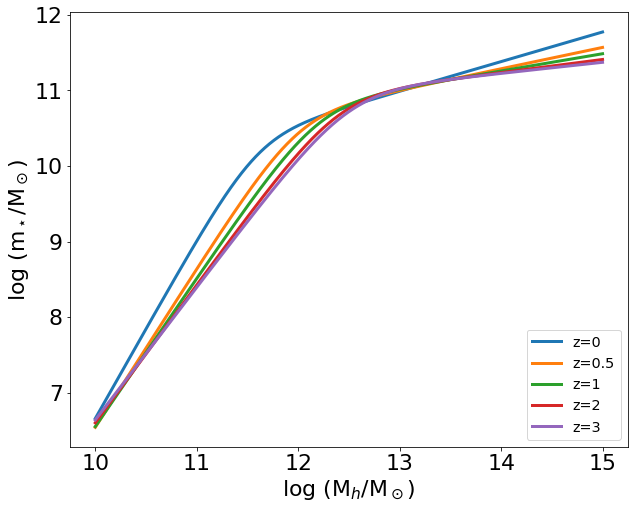

In [14]:
fig,ax = plt.subplots(figsize=(10,8))

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

for i, Moster in enumerate(Mosters):
    plt.plot(np.log10(Mh), np.log10(Moster.StellarMass()),lw = 3, label=f'z={z_vals[i]}')

# Axes labels 
plt.xlabel('log (M$_h$/M$_\odot$)',fontsize=22) 
plt.ylabel('log (m$_\star$/M$_\odot$)', fontsize=22)

# Legend
plt.legend(loc='lower right',fontsize='x-large');

# Part D

# Q1

In traditional models of the Magellanic Clouds (prior to 2010), the LMC is thought to have a halo mass of order $3 \times 10^{10}$ M$_\odot$.  According to LCDM theory, what should be the stellar mass of such a halo?  

How does this compare against the actual observed stellar mass of the LMC at the present day of $3 \times 10^9$ M$_\odot$ ? 

What is the $\Lambda$CDM expected halo mass? What is the origin of any discrepancy? 

In [15]:
LMC = AbundanceMatching(3e10, 0)

LMC.StellarMass() / 1e7

6.158217361361505

In [16]:
LMC2 = AbundanceMatching(1.65e11, 0)
LMC2.StellarMass() / 1e9

3.0094661067077957

# Q2


What is the expected stellar mass of an L* galaxy at z=0? 

What is the expected stellar mass of an L* galaxy at z = 2?  

In [17]:
LMC2.logM1()

11.59

In [18]:
MstarZ0 = AbundanceMatching(10*LMC2.logM1(), 0)
MstarZ0.StellarMass()

6.349789903787068e-13